<a href="https://colab.research.google.com/github/amy-panda/Supply_Chain_Forecasting/blob/main/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Exploratory Data Analysis

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [3]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [8]:
path = "/content/drive/MyDrive/Forge/Cognizant_AI_Program/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

In [9]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using .shape to display the number of rows and columns for the dataframe

In [5]:
df.shape

(7829, 9)

---

## Section 3 - Descriptive statistics

To display the column names, data type of columns and how many null values exist for each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


To compute descriptive statistics of numerical columns

In [7]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


To print out the datetime range of the column `timestamp`

In [ ]:
print(df['timestamp'].min())
print(df['timestamp'].max())

2022-03-01 09:00:13
2022-03-07 19:59:54


In [12]:
# df['category'].unique()

In [13]:
# df['customer_type'].unique()

In [14]:
# df['payment_type'].unique()

---

## Section 4 - Visualisation

Now that we've computed some descriptive statistics of the dataset, let's create some visualisations with the `seaborn` package.

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To import the packages of seaborn and matplotlib

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### Exploring the data distribution of a numeric or categorical variable

To display distribution of the variable `unit_price` using histogram and kernel density estimate (KDE) plot. 

Text(0.5, 1.0, 'Distribution of unit price')

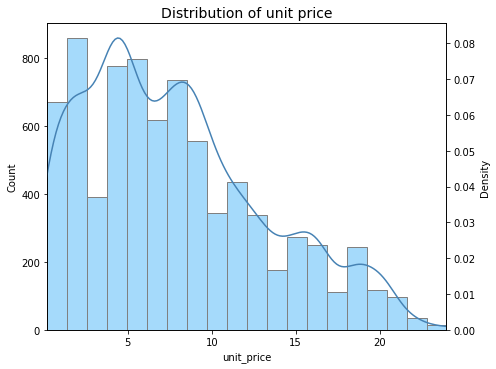

In [ ]:
fig, ax1 = plt.subplots(figsize=(7,5))
sns.histplot(data=df, x="unit_price",bins=20,ax=ax1,color="lightskyblue",edgecolor="grey")
ax2 = ax1.twinx()
sns.kdeplot(data=df, x="unit_price", ax=ax2,color="steelblue")
ax2.set_xlim((df["unit_price"].min(), df["unit_price"].max()))
fig.tight_layout()
plt.title('Distribution of unit price',fontsize=14)

**Findings**:
- Unit price ranged from 0 to 25. (not equal to 0)
- Over 50% of items had a unit price below 10. 

To display distribution of the variable `quantity` with a histogram

Text(0.5, 1.0, 'Distribution of quantity')

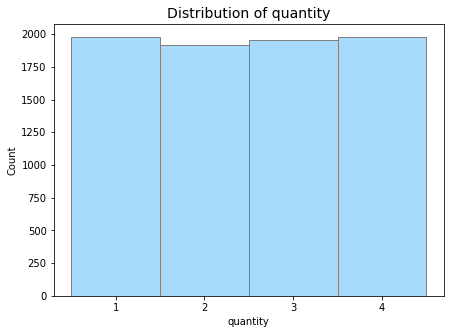

In [ ]:
f,ax=plt.subplots(figsize=(7,5))
sns.histplot(df,x="quantity",discrete=True,color="lightskyblue",edgecolor="grey")
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())  #ScalarFormatter is default formatter for scalars: autopic the format string
ax.set_xticks([1,2,3,4])
plt.title('Distribution of quantity',fontsize=14)

**Findings**:
- The quantity of an item purchased under the same transaction was between 1 and 4. 
- The quantity values 1-4 are almost equally distributed even though the number of records for quantity=2 is slightly lower.

Create functions to extract unique values and display distribution of categorical variables

In [11]:
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 5, aspect: int = 1.5, palette="Pastel1"):
  g=sns.catplot(data=data, x=column, kind='count', order=data[column].value_counts().index, height=height, aspect=aspect, palette=palette)
  ax = g.facet_axis(0,0)
  # label each bar in catplot
  for p in ax.patches:
    # get the height of each bar
    height = p.get_height() 
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height*0.95, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') 
  plt.title(f'Distribution of {column}', fontsize=14)
    
  
 # Credit: https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9 
 # Credit: https://stackoverflow.com/questions/53029604/how-to-add-bar-value-on-the-top-catplot-seaborn
 # Creidt: https://stackoverflow.com/questions/24618862/how-to-change-the-order-of-factor-plot-in-seaborn



To extract unique values of the categorical variable `customer_type` and display its distribution

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


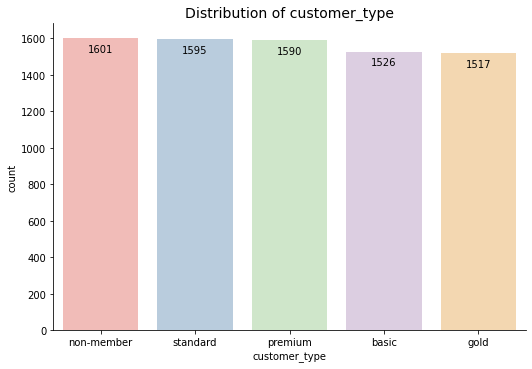

In [ ]:
get_unique_values(df,column='customer_type')
plot_categorical_distribution(data=df, column='customer_type')

**Findings**:
- The customer type with highest transactions is non-member.
- The customers with a types of 'basic' or 'gold' had slightly fewer transactions compared to remaining types - 'non-member', 'standard' and 'premium'. 

To extract unique values of the categorical variable `payment_type` and display its distribution

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


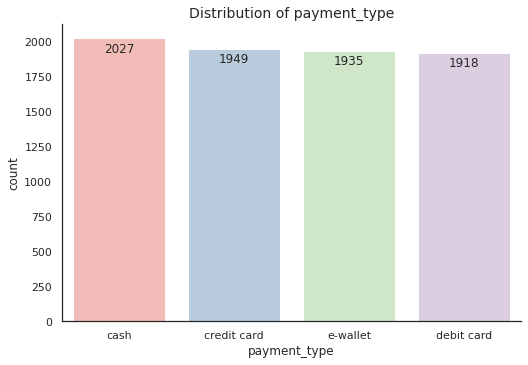

In [ ]:
get_unique_values(df,column='payment_type')
plot_categorical_distribution(data=df, column='payment_type')

**Findings**:
- There are 4 payment types used in transactions that is cash, credit card, e-wallet and debit card.
- Cash is the most commonly used payment type among customer.

To extract unique values of the categorical variable `category` and display its distribution

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

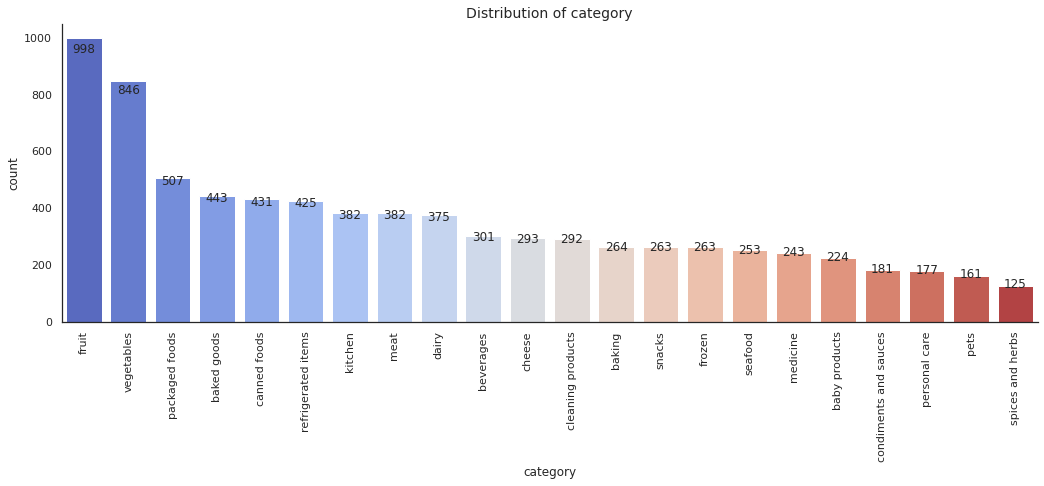

In [ ]:
get_unique_values(df,column='category')
plot_categorical_distribution(data=df, column='category',height=5,aspect=3,palette="coolwarm")
plt.xticks(rotation=90)

**Findings**:
- There are 22 categories of items sold.
- The top five categories include fruit, vegetables, packaged food, baked food and canned foods.
- Spices and herbs was the least popular category among transactions.

### Correlation Analysis

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='Pastel1')

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


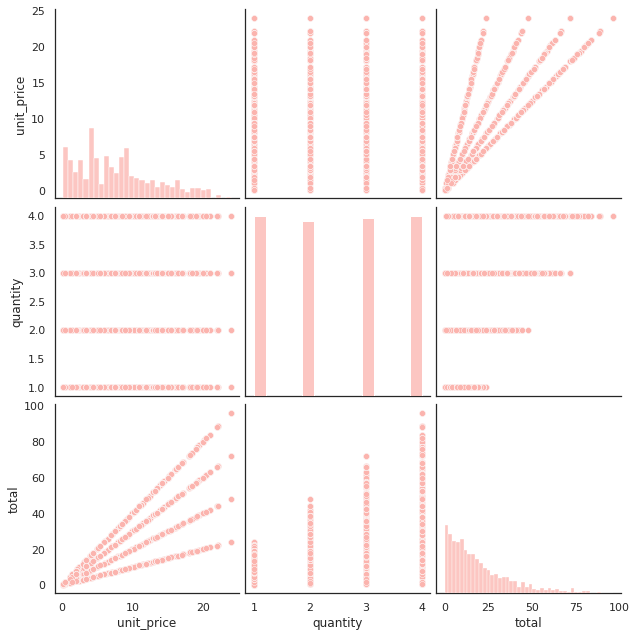

In [ ]:
sns.pairplot(df,height=3)

### Exploring two or more variables

Create functions to explore the relationship between quantity and other variables

In [22]:
def plot_quantity_relationship(data: pd.DataFrame = None, col_x: str = None, col_y: str = 'quantity', height: int = 5, aspect: int = 1.5, palette: str='Pastel1'):
  data_summary=data[[col_x,col_y]].groupby(col_x).sum().reset_index()
  fig,ax=plt.subplots(figsize=(height*aspect,height))
  sns.set_theme(style="white",palette=palette)
  ax=sns.barplot(data=data_summary, x=col_x, y=col_y,order=data_summary.sort_values(col_y,ascending = False)[col_x])
  
  # label each bar in barplot
  for p in ax.patches:
    # get the height of each bar
    height = p.get_height() 
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height*0.95, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') 
  plt.title(f'{col_y} by {col_x}', fontsize=14)
  plt.xlabel("")

  #Credit: https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/

To explore the quantity by customer_type

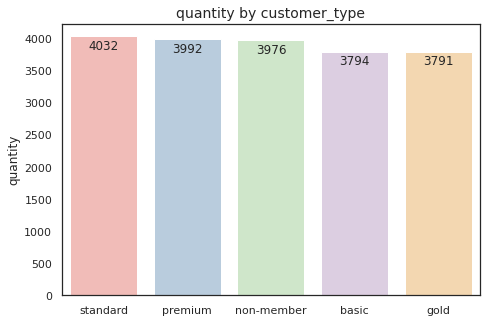

In [23]:
plot_quantity_relationship(df,col_x='customer_type')

To explore the quantity by payment_type

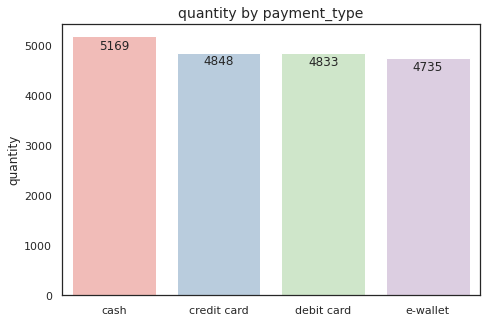

In [24]:
plot_quantity_relationship(df,col_x='payment_type')

To explore the quantity by category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

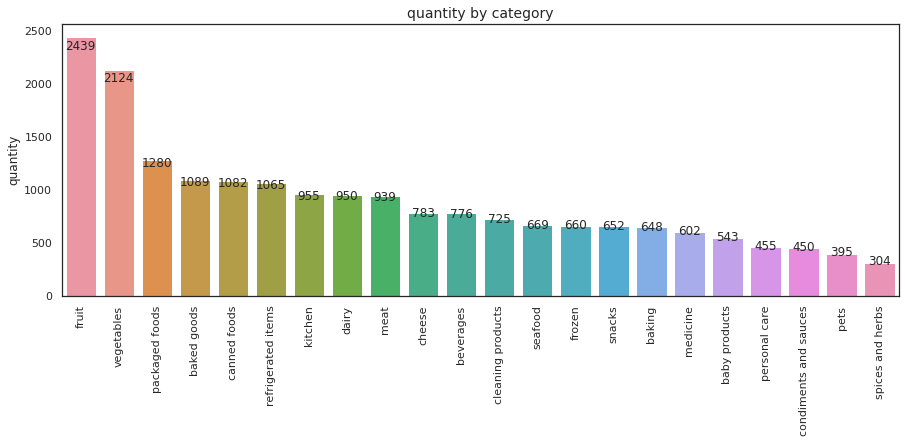

In [25]:
plot_quantity_relationship(df,aspect=3,col_x='category')
plt.xticks(rotation=90)

To explore the quantity by day of week

To convert the column of 'timestamp' from object to datetime

In [26]:
df['timestamp']=pd.to_datetime(df['timestamp'])

To create the new column named 'weekofday'

In [27]:
df['weekofday']=df['timestamp'].dt.day_name()

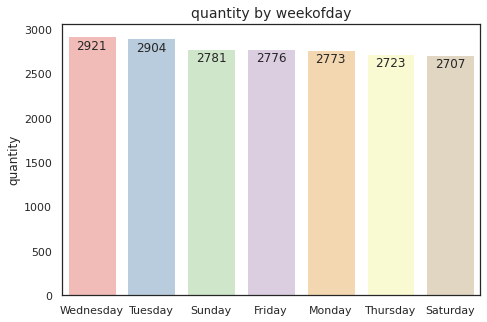

In [28]:
plot_quantity_relationship(df,col_x='weekofday')

Create functions to explore the relationship between price and other variables

In [29]:
def plot_price_relationship(data: pd.DataFrame = None, col_x: str = None, col_y: str = 'unit_price', height: int = 5, aspect: int = 1.5, palette: str='Pastel1'):
  fig, ax=plt.subplots(figsize=(aspect*height,height))
  sns.set_theme(style="white",palette=palette)
  order = df.groupby(col_x)[col_y].mean().sort_values().index
  ax=sns.boxplot(x=col_x,y=col_y, data=data, order=order,showmeans=True,
               meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})
  plt.xticks(rotation=90)
  plt.xlabel("")

# Credit https://datavizpyr.com/show-mean-mark-on-boxplot-using-seaborn-in-python/

To explore the unit price by day of week

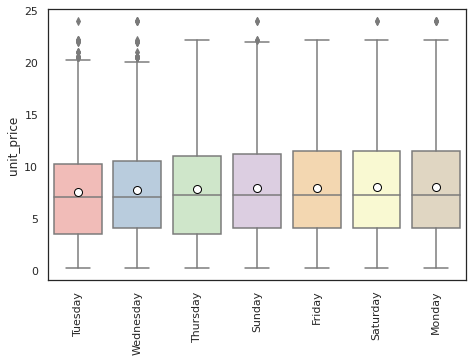

In [30]:
plot_price_relationship(data=df,col_x='weekofday')

In [33]:
# df.groupby(by=["weekofday"])["unit_price"].agg(['median','mean'])

In [34]:
df.groupby(by=["weekofday"])["unit_price"].mean().sort_values()

weekofday
Tuesday      7.538498
Wednesday    7.692911
Thursday     7.765325
Sunday       7.899364
Friday       7.901733
Saturday     7.972216
Monday       7.989728
Name: unit_price, dtype: float64

To explore the unit price by category

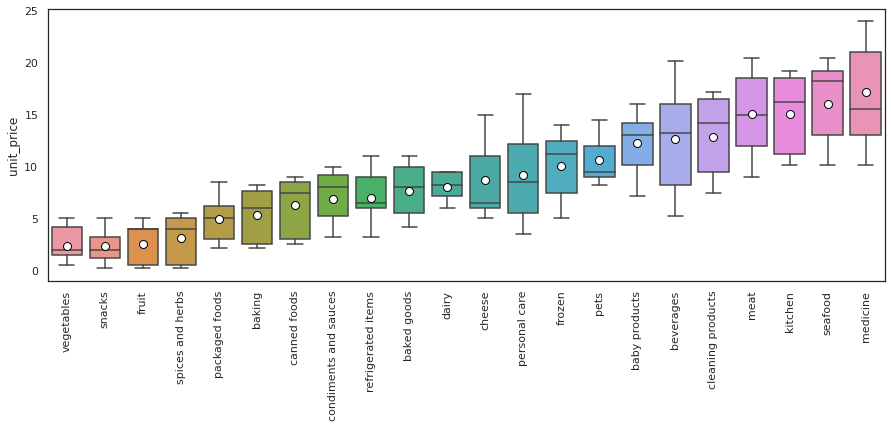

In [35]:
plot_price_relationship(data=df,col_x='category',aspect=3)

In [36]:
# Order the price in ascending order
# order = df.groupby("weekofday")["unit_price"].mean().sort_values().index
# sns.boxplot(x='weekofday',y='unit_price', data=df, order=order)
# plt.xticks(rotation=90)

In [37]:
# fig, ax=plt.subplots(figsize=(7,5))
# sns.set_theme(style="white",palette='Pastel1')
# order = df.groupby("weekofday")["unit_price"].mean().sort_values().index
# ax=sns.boxplot(x='weekofday',y='unit_price', data=df, order=order,showmeans=True,
#                meanprops={"marker":"o",
#                        "markerfacecolor":"white", 
#                        "markeredgecolor":"black",
#                       "markersize":"8"})
# plt.xticks(rotation=90)

In [38]:
# df.groupby("weekofday")["unit_price"].mean().sort_values().index

In [39]:
# df.groupby(by=["weekofday"])["unit_price"].median().iloc[::-1].index

Create functions to explore the relationship between two categorical variables

In [54]:
def plot_category_two(data: pd.DataFrame = None, col_x: str = None, col_y: str =None , height: int = 5, aspect: int = 1.5):
  data_new=data.groupby([col_x,col_y])['quantity'].sum().reset_index()
  if col_y=='weekofday':
    data_new[col_y]=pd.Categorical(data_new[col_y],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
  elif col_y=='customer_type':
    data_new[col_y]=pd.Categorical(data_new[col_y],categories=['non-member','basic','standard','premium','gold'],ordered=True)
  data_new.sort_values(col_y,inplace=True)
  data_piv=data_new.pivot(col_x,col_y,"quantity")
  f, ax = plt.subplots(figsize=(aspect*height, height))
  sns.heatmap(data_piv, annot=True, fmt="d", linewidths=.5, ax=ax)

To explore the relationship between day of week and customer type

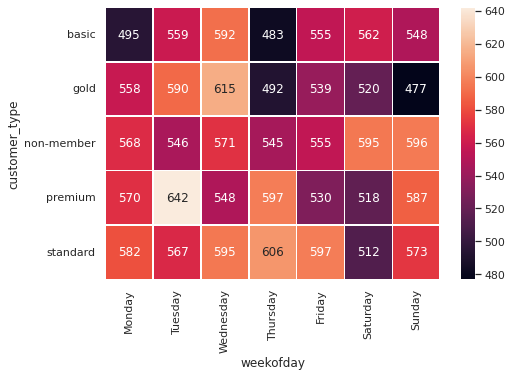

In [55]:
plot_category_two(data=df,col_x='customer_type',col_y='weekofday')

To explore the relationship between day of week and category

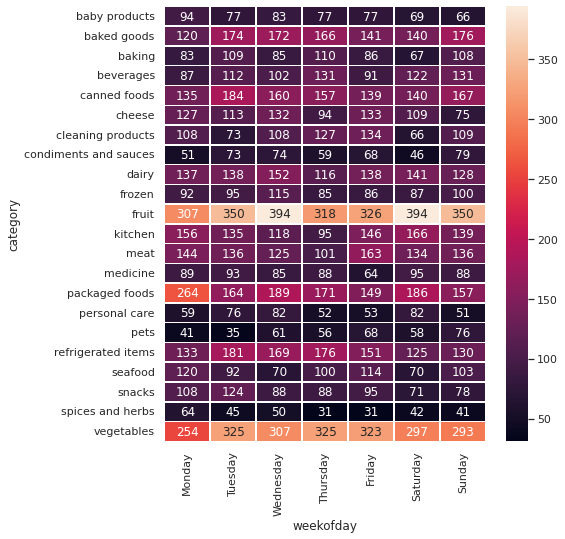

In [56]:
plot_category_two(data=df,col_x='category',col_y='weekofday',height=8,aspect=0.9)

To explore the relationship between customer type and payment type

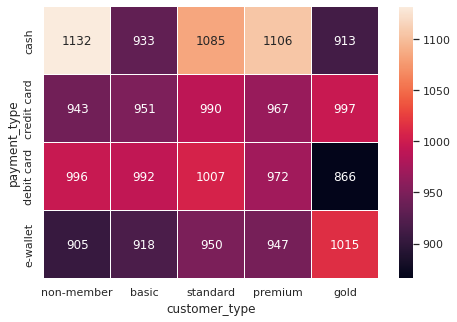

In [57]:
plot_category_two(data=df,col_x='payment_type',col_y='customer_type')

To explore the relationship between customer type and category

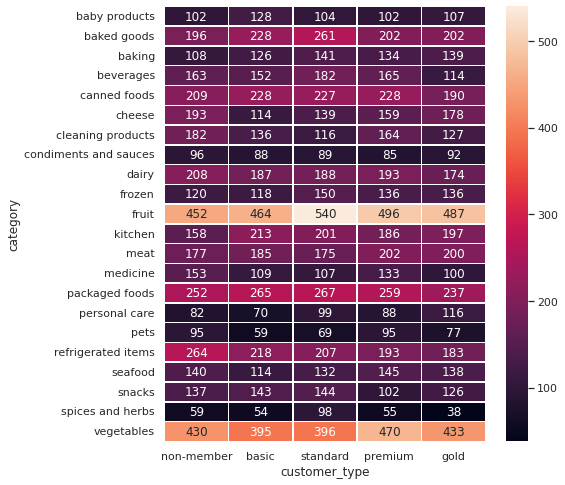

In [59]:
plot_category_two(data=df,col_x='category',col_y='customer_type',height=8,aspect=0.9)

**Case for heatmap in seaborn**

In [ ]:
flights=sns.load_dataset("flights").pivot("month", "year", "passengers")

In [ ]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


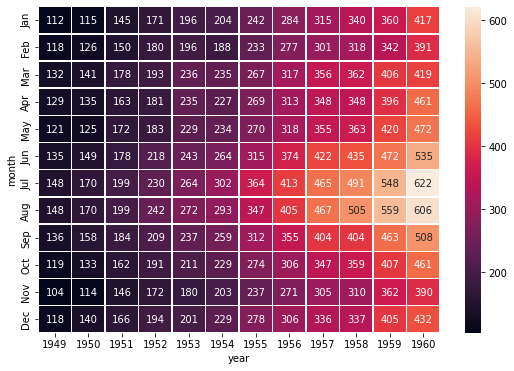

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

Working steps for the functions of two categorical variables

In [61]:
# df_new=df.groupby(['customer_type','weekofday'])['quantity'].sum().reset_index()
# df_new.head(10)

In [62]:
# df_new.dtypes

In [63]:
# df_new['weekofday']=pd.Categorical(df_new['weekofday'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
# pd.Categorical(df_new['weekofday'])

In [64]:
# df_new.sort_values('weekofday',inplace=True)
# df_new.head()

In [65]:
# df_piv=df_new.pivot("customer_type","weekofday","quantity")
# df_piv

In [66]:
# f, ax = plt.subplots(figsize=(7, 5))
# sns.heatmap(df_piv, annot=True, fmt="d", linewidths=.5, ax=ax)

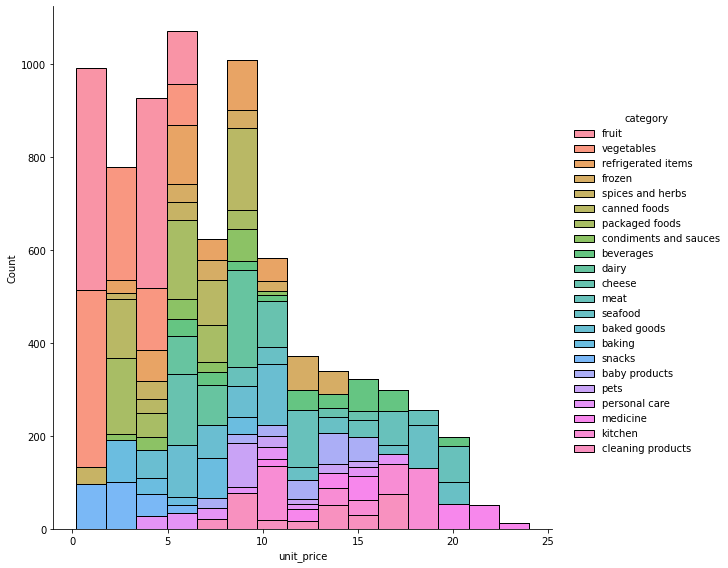

In [ ]:
sns.displot(df,x="unit_price",bins=15,hue="category",multiple="stack",height=8)

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

